# RAPOC
## Rosseland and Planck Opacity Converter

Welcome to the `RAPOC` (Rosseland And Planck Opacity Converter) quick-start guide. This notebook is an interactive instruction manual that will demonstrate how `RAPOC` can be used and how it can be included in one's own code.


## Input

The only input required by `RAPOC` is the opacity data. Opacity data can be directly downloaded from dedicated repositories such as ExoMol or, instead, by a custom made Python dictionary. In this example, the water opacities from ExoMol will be used. These can be downloaded from http://exomol.com/db/H2O/1H2-16O/POKAZATEL/1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5 After this, they should be copied or moved into the `examples` directory. However, if other molecules are required then they can be downloaded here: http://exomol.com/data/data-types/opacity/.

In [1]:
input_file = '1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5'

## Import and initialise

Once the data is ready, the required models can be imported and initialised. In this example, both the Rosseland and Planck models will be used.

In [2]:
from rapoc import Rosseland, Planck

ross = Rosseland(input_data=input_file)
plan = Planck(input_data=input_file)

## Input contents
Once the classes have been initialised, a large amount of information from the input files becomes available to the user. Currently, the information content of the two classes is identical. 
This can be seen by printing the data. As one can see, all of the numbers have units, which is provided by the `astropy.units` packages.

In [3]:
print('molecular name')
print(ross.mol)

print('molecular mass')
print(plan.mol_mass)

print('temperature grid')
print(ross.temperature_grid)

print('pressure grid')
print(plan.pressure_grid)

print('wavenumber grid')
print(ross.wavenumber_grid)

print('wavelength grid')
print(plan.wavelength_grid)

print('frequency grid')
print(ross.frequency_grid)

print('opacitie')
print(plan.opacities)

molecular name
H2O
molecular mass
2.991508785951112e-23 g / ct
temperature grid
[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2200. 2400. 2600. 2800.
 3000. 3200. 3400.] K
pressure grid
[1.00000000e+00 2.15443469e+00 4.64158883e+00 1.00000000e+01
 2.15443469e+01 4.64158883e+01 1.00000000e+02 2.15443469e+02
 4.64158883e+02 1.00000000e+03 2.15443469e+03 4.64158883e+03
 1.00000000e+04 2.15443469e+04 4.64158883e+04 1.00000000e+05
 2.15443469e+05 4.64158883e+05 1.00000000e+06 2.15443469e+06
 4.64158883e+06 1.00000000e+07] N / m2
wavenumber grid
[  199.99326855   200.00660143   200.01993521 ... 33328.88933329
 33331.11125925 33333.33333333] 1 / cm
wavelength grid
[50.00168292 49.9983497  49.9950167  ...  0.30004     0.30002
  0.3       ] um
frequency grid
[5.99564736e+12 5.99604707e+12 5.99644680e+12 ... 9.99174966e+14
 9.99241577e+14 9.99308193e+14] 1 / s
ktable
[[[8.74265301e-05 8.82690797e-05 8.91244468e-05 ... 1.

## Mean opacity estimation

### Indicate the input parameters

To estimate the mean opacities, a pressure, temperature and wavelength (or wavenumber or frequency) range is required as inputs. In order to avoid confusion, astropy.units should be used to indicate the units. Otherwise, `Pa` are assumed for pressure and `K` for temperature. In order to indicate whether wavelength, wavenumbers or frequency are used, the appropriate units should be given. The `RAPOC` code will interpret the parameters being used from their units.
Pressure and temperature can be either single values or lists. In the first case, the code will return a single value, as shown in the following example. In the latter case, `RAPOC` will return an array with dimensions matching the inputs.

In [4]:
import astropy.units as u

P = 1000.0 *u.Pa
T = 1000.0 *u.K
wl = (1 * u.um, 10 * u.um)

### Calculating opacities using the `closest` method
The fastest estimation method is the `closest` mode. Using this mode, the code looks into the input data’s pressure and temperature grids for the closest pressure and temperature to the one indicated. After this, it will return the mean opacity value requested.

In [5]:
%matplotlib inline

r_estimate = ross.estimate(P_input = P, T_input=T, band=wl, mode='closest')
print(r_estimate)

p_estimate = plan.estimate(P_input = P, T_input=T, band=wl, mode='closest')
print(p_estimate)

0.004176211148085985 m2 / kg
17.946602758752658 m2 / kg


/home/lorenzo/anaconda3/envs/py3.8/lib/python3.8/site-packages/rapoc/models/rosseland.py:132: RuntimeWarning: Ktable contains zeros. They have been replaced with 1e-300
  warnings.warn('Ktable contains zeros. They have been replaced with 1e-300', RuntimeWarning)


A plot can be generated to illustrate the difference between the calculated mean opacities and the raw data.

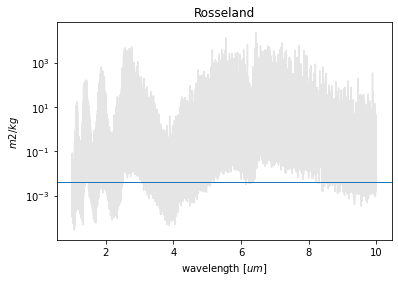

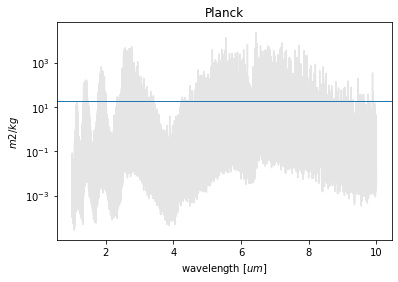

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig0, ax0 = ross.estimate_plot(P_input = P, T_input=T, band=wl, mode='closest')

fig1, ax1 = plan.estimate_plot(P_input = P, T_input=T, band=wl, mode='closest')



### Calculating opacities using interpolation methods
Using the interpolation method it is possible to explore temperature and pressure values that are not in the input grid. To do so, `scipy.interpolate.griddata` is used. Two interpolation modes are included: `linear`, `loglinear`.

This mode may be slow because the code needs to produce a map to estimate the mean opacities for each value of the data grid. To make this process faster, `RAPOC` will continue to reuse this map until the user asks for estimates in another wavelength range. Only then would `RAPOC` produce a new map.

In [7]:
r_estimate = ross.estimate(P_input = P, T_input=T, band=wl, mode='linear')
print(r_estimate)

p_estimate = plan.estimate(P_input = P, T_input=T, band=wl, mode='linear')
print(p_estimate)

/home/lorenzo/anaconda3/envs/py3.8/lib/python3.8/site-packages/rapoc/models/model.py:358: UserWarning: Computing map.
  warnings.warn('Computing map.', UserWarning)
/home/lorenzo/anaconda3/envs/py3.8/lib/python3.8/site-packages/rapoc/models/rosseland.py:132: RuntimeWarning: Ktable contains zeros. They have been replaced with 1e-300
  warnings.warn('Ktable contains zeros. They have been replaced with 1e-300', RuntimeWarning)


0.004176211148085985 m2 / kg
17.946602758752658 m2 / kg


To illustrate the efficacy of `RAPOC`, the mean opacities can be estimated and plotted for a list of temperatures and pressures.

[[0.00094728 0.03303942 0.17086334]
 [0.00484263 0.08600765 0.21673218]] m2 / kg
[[27.18478963 17.36108261  8.57782242]
 [27.17086583 17.78923892  8.8249388 ]] m2 / kg


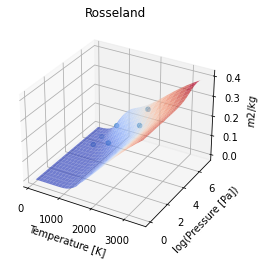

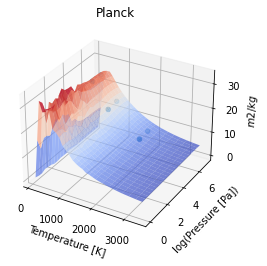

In [8]:
P = [1, 10 ] *u.bar
T = [500.0, 1000.0, 2000.0] *u.K

r_estimate = ross.estimate(P_input = P, T_input=T, band=wl, mode='linear')
print(r_estimate)

p_estimate = plan.estimate(P_input = P, T_input=T, band=wl, mode='linear')
print(p_estimate)

fig2, ax2 = ross.estimate_plot(P_input = P, T_input=T, band=wl, mode='linear')

fig3, ax3 = plan.estimate_plot(P_input = P, T_input=T, band=wl, mode='linear')

If instead two distinct wavelength bands are required, two models can be used at the same time in order to optimise the map building procedure.

Once the map has been built, it is possible to verify the wavelength band by calling upon the `band` attribute:

In [9]:
wl1 = (1 * u.um, 10 * u.um)
ross1 = Rosseland(input_data=input_file)
ross1.map(band=wl1)
wl2 = (10 * u.um, 50 * u.um)
ross2 = Rosseland(input_data=input_file)
ross2.map(band=wl2)
print('maps built:')
print('ross1 band:', ross1.band)
print('ross2 band:', ross2.band)


P = 1 *u.bar
T = [500.0, 1000.0, 2000.0] *u.K
for t in T:
    r1 = ross1.estimate(P_input = P, T_input=t, band=wl1, mode='linear')
    r2 = ross2.estimate(P_input = P, T_input=t, band=wl2, mode='linear')
    print(r1, r2)


maps built:
ross1 band: (<Quantity 1. um>, <Quantity 10. um>)
ross2 band: (<Quantity 10. um>, <Quantity 50. um>)
0.0009472775213717088 m2 / kg 0.009915775679228966 m2 / kg
0.03303941548098997 m2 / kg 0.36504089402541 m2 / kg
0.17086334490692245 m2 / kg 14.890719669682868 m2 / kg


## Rayleigh scattering
`RAPOC` can estimate the Rayleigh scattering absorption for a list of atoms. To compute the Rayleigh scattering mean opacities, the first step is to produce the Rayleigh data set for the desired atom.
Because we already have a wavenumbers grid inside the Rosseland and Planck model, we can use one of them to initialise the Rayleigh class. Then we can inject the produced data into a Rosseland or Planck model to estimate the mean opacities.

In [10]:
from rapoc import Rayleigh
rayleigh = Rayleigh(atom='Na', model=ross)

ros = Rosseland(input_data=rayleigh)
pl = Planck(input_data=rayleigh)

r_estimate = ros.estimate(T_input=T, band=wl)
print(r_estimate)

p_estimate = pl.estimate(T_input=T, band=wl)
print(p_estimate)

[[9.99363701e-08 3.73658451e-07 1.72974404e-06]] m2 / kg
[[3.52858738e-07 3.85515761e-06 2.72176733e-05]] m2 / kg
